In [1]:
#Checks that SparkContect is avaliable to run Spark jobs
sc

In [2]:
#INGESTION
#Load the first .csv file into a spark data frame
athleteDf = spark.read.format("csv").option("header", "true").load("/home/bdtech/athlete_events.csv")

In [3]:
#This displays the database schema for the loaded in .csv
athleteDf.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [4]:
#This loads in the second .csv file into a dataframe
regionsDf = spark.read.format("csv").option("header", "true").load("/home/bdtech/noc_regions.csv")

In [5]:
#This displays the schema for this dataframe
regionsDf.printSchema()

root
 |-- NOC: string (nullable = true)
 |-- region: string (nullable = true)
 |-- notes: string (nullable = true)



In [6]:
#This drops the unnecessary columns from the dataframe and shows the new database schema
athleteDf = athleteDf.drop('Name', 'Sex', 'Age', 'Height', 'Weight', 'Team','Games', 'City', 'Medal')
athleteDf.printSchema()

root
 |-- ID: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)



In [7]:
#This drops the unnecessary columns from the dataframe and shows the new database schema
regionsDf = regionsDf.drop('notes')
regionsDf.printSchema()

root
 |-- NOC: string (nullable = true)
 |-- region: string (nullable = true)



In [8]:
#This creates a join in the two dataframes based on the NOC column
fullInfoDf = athleteDf.join(regionsDf, "NOC")

In [9]:
#This prints the schema of the newly joined dataframe
fullInfoDf.printSchema()

root
 |-- NOC: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- region: string (nullable = true)



In [10]:
#This shows the first twenty rows of the dataframe
fullInfoDf.show()

+---+---+----+------+--------------------+--------------------+-----------+
|NOC| ID|Year|Season|               Sport|               Event|     region|
+---+---+----+------+--------------------+--------------------+-----------+
|CHN|  1|1992|Summer|          Basketball|Basketball Men's ...|      China|
|CHN|  2|2012|Summer|                Judo|Judo Men's Extra-...|      China|
|DEN|  3|1920|Summer|            Football|Football Men's Fo...|    Denmark|
|DEN|  4|1900|Summer|          Tug-Of-War|Tug-Of-War Men's ...|    Denmark|
|NED|  5|1988|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|NED|  5|1988|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|NED|  5|1992|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|NED|  5|1992|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|NED|  5|1994|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|NED|  5|1994|Winter|       Speed Skating|Speed Skating Wom...|Netherlands|
|USA|  6|199

In [11]:
#This imports the sql functions which will then allow for filtering of the data
import pyspark.sql.functions as f

In [12]:
#This creates a new dataframe with only the results from the 2012 Summer Games in it and then shows the first 20 rows
games = fullInfoDf.filter((f.col('Year')=='2012') & (f.col('Season')=='Summer'))
games.show()

+---+---+----+------+--------------------+--------------------+---------+
|NOC| ID|Year|Season|               Sport|               Event|   region|
+---+---+----+------+--------------------+--------------------+---------+
|CHN|  2|2012|Summer|                Judo|Judo Men's Extra-...|    China|
|FRA| 34|2012|Summer|           Athletics|Athletics Men's 1...|   France|
|MAR| 48|2012|Summer|              Boxing|Boxing Men's Ligh...|  Morocco|
|RUS| 67|2012|Summer|           Athletics|Athletics Women's...|   Russia|
|FRA| 73|2012|Summer|            Handball|Handball Men's Ha...|   France|
|ARG| 74|2012|Summer|              Rowing|Rowing Women's Co...|Argentina|
|ITA| 91|2012|Summer|           Athletics|Athletics Men's 1...|    Italy|
|ALG|105|2012|Summer|              Boxing|Boxing Men's Welt...|  Algeria|
|PAK|123|2012|Summer|              Hockey| Hockey Men's Hockey| Pakistan|
|PAK|127|2012|Summer|              Hockey| Hockey Men's Hockey| Pakistan|
|IRI|128|2012|Summer|              Row

In [13]:
#This creates a new dataframe with only the results from the 2008 Summer Games in it and then shows the first 20 rows
gamesOther = fullInfoDf.filter((f.col('Year')=='2008') & (f.col('Season')=='Summer'))
gamesOther.show()

+---+---+----+------+----------+--------------------+------------+
|NOC| ID|Year|Season|     Sport|               Event|      region|
+---+---+----+------+----------+--------------------+------------+
|NOR| 21|2008|Summer|  Handball|Handball Women's ...|      Norway|
|EST| 49|2008|Summer| Athletics|Athletics Women's...|     Estonia|
|ESP| 63|2008|Summer|   Fencing|Fencing Men's epe...|       Spain|
|RUS| 67|2008|Summer| Athletics|Athletics Women's...|      Russia|
|ESP| 69|2008|Summer|Basketball|Basketball Women'...|       Spain|
|BLR| 72|2008|Summer|  Canoeing|Canoeing Men's Ka...|     Belarus|
|FRA| 73|2008|Summer|  Handball|Handball Men's Ha...|      France|
|ITA| 92|2008|Summer|  Football|Football Men's Fo...|       Italy|
|FRA| 93|2008|Summer|  Handball|Handball Men's Ha...|      France|
|PAK|127|2008|Summer|    Hockey| Hockey Men's Hockey|    Pakistan|
|AZE|129|2008|Summer| Athletics|Athletics Men's 1...|  Azerbaijan|
|AZE|130|2008|Summer|  Swimming|Swimming Men's 50...|  Azerbai

In [14]:
#FILE STORAGE

#This creates a new MongoDB collection called athlete and then saves the full joined table in it
fullInfoDf.write.format("com.mongodb.spark.sql.DefaultSource")  \
.mode("append") \
.option("database","test") \
.option("collection", "athlete").save()

In [15]:
#This creates a new MongoDB collection called Games and then saves the 2012 table in it
games.write.format("com.mongodb.spark.sql.DefaultSource")  \
.mode("append") \
.option("database","test") \
.option("collection", "Games").save()

In [16]:
#This creates a new MongoDB collection called Games and then saves the 2008 table in it
gamesOther.write.format("com.mongodb.spark.sql.DefaultSource")  \
.mode("append") \
.option("database","test") \
.option("collection", "GamesOther").save()

In [17]:
#Visualisation

#Imports the pymongo library
import pymongo
from pymongo import MongoClient
#creates a new MongoDB Client to be used in accessing the stored MongoDB documents
client = MongoClient()
#Imports the Python Pandas library
import pandas
#Looks for the fully joined table in the MongoDB Database
result = client.test.athlete.find()
#stores the database as a pandas dataframe
result_df=pandas.DataFrame(list(result))

#Looks for the 2012 table in the MongoDB Database
result2012 = client.test.Games.find()
#stores the database as a pandas dataframe
result2012_df = pandas.DataFrame(list(result2012))

#Looks for the 2008 table in the MongoDB Database
result2008 = client.test.GamesOther.find()
#stores the database as a pandas dataframe
result2008_df = pandas.DataFrame(list(result2008))

In [18]:
#Queries the fully joined table and counts the amount of occurences for each NOC and 
#therefore how many times a country
#has won a medal
result_df['NOC'].value_counts().nlargest(25)

USA    18331
FRA    12753
GBR    12241
ITA    10715
GER     9807
CAN     9698
JPN     8444
SWE     8332
AUS     7629
HUN     6607
POL     6207
SUI     6150
NED     5823
URS     5684
FIN     5467
ESP     5311
CHN     5141
RUS     5141
AUT     5135
NOR     4960
KOR     4464
ROU     4405
TCH     4403
BEL     3857
BRA     3848
Name: NOC, dtype: int64

In [19]:
#This allows for the created graphs to show within the notebook
%matplotlib inline
#Imports the matplotlib library
import matplotlib.pyplot as plt
import pandas as pd

#Queries the 2012 dataframe and displays the 10 most winningest countries from that year
count = result2012_df['NOC'].value_counts().nlargest(10)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#Queries the 2008 dataframe and displays the 10 most winningest countries from that year
count2 = result2008_df['NOC'].value_counts().nlargest(10)

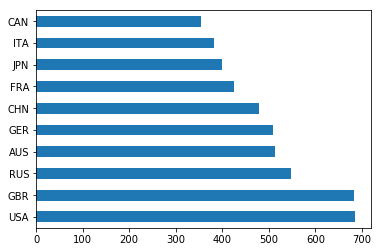

In [24]:
#Imports the ipywidgets that will be used to create a user interace that allows for selevtion dataframe
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import clear_output

#Adds the years to the dropdown menu
items = ['2012']+['2008']
#Fills the drop down menu with the years
w = widgets.Select(options=items)

#Checks to see what year is chosen and displays the correct graph
def view(x=''):
    with out:
        clear_output()
        if x=='2012':return count.plot.barh()
        return count2.plot.barh()

#Makes the notebook Interactive
interactive(view, x=w)   